## AIS Validation

In [155]:
# from IPython.display import Image, HTML
import os
import numpy as np
import pandas as pd
import datetime
import warnings
from glob import glob

warnings.filterwarnings("ignore")           # Suppress Warning

In [156]:
WorkingFolder = "/Users/cv0361/Desktop/TechChallenge/Data/csv/AIS_Processed/"

In [157]:
OutputDir = WorkingFolder

### Combining Vessels Data

In [158]:
# Combining all Vessels Data
df_list = list()

for folder in glob(WorkingFolder + "*/"):
    
    #******** Temp hack
    folder = "/Users/cv0361/Desktop/TechChallenge/Data/csv/AIS_Processed/Zone03_2017_01/"
    #************
    
    print(folder)
    df = pd.read_csv(folder + "Vessel.csv", sep=",")
    
    print("Rows:", len(df))
    
    df_list.append(df)
    
    break
    
Vessel = pd.concat(df_list, ignore_index=True)
print("Total Rows:", Vessel.shape)

# Remove duplicate vessel records after combining all the zones/years
Vessel.drop_duplicates(inplace=True)

print("Non-Dup Total Rows:", Vessel.shape)
# Vessel.reset_index(inplace=True)

/Users/cv0361/Desktop/TechChallenge/Data/csv/AIS_Processed/Zone03_2017_01/
Rows: 823
Total Rows: (823, 7)
Non-Dup Total Rows: (823, 7)


In [159]:
Vessel.shape

(823, 7)

In [160]:
Vessel.head()

,mmsi_id,imo,call_sign,vessel_name,vessel_type,length,width
0,564294000,IMO9736963,9V2597,PEGASUS OCEAN,1004.0,174.53,NaN
1,367373760,IMO7915905,WDE5954,NORTH SEA,1001.0,37.32,9.56
2,367094420,IMO7926605,WDC8874,ARCTIC MARINER,1001.0,31.00,9.28
3,373073000,IMO9605097,3FGE2,PACIFIC CYPRESS,1004.0,179.98,29.80
4,367124050,IMO7609295,WDA6405,CASCADE MARINER,1001.0,25.06,7.32


In [161]:
Vessel.tail()

,mmsi_id,imo,call_sign,vessel_name,vessel_type,length,width
818,356839000,IMO9514389,3EVW8,MEDI OKINAWA,1004.0,189.98,32.25
819,371449000,IMO9416977,3FNL8,NYK RIGEL,1004.0,294.10,32.20
820,566662000,IMO9603439,9V9450,CAPE AZALEA,1004.0,300.00,50.00
821,311000317,IMO9700299,C6BO3,AFRICAN ROOK,1004.0,183.00,30.60
822,477464500,IMO9484352,VRKX9,COSCO JEDDAH,1004.0,261.10,32.25


### Validate MMSI Id

In [162]:
# Cast MMSI Id field to string
Vessel['TempId'] = Vessel['mmsi_id'].map(lambda x: str(x))
# Fetch the field lengh (number of digits)
Vessel['Id_len'] = Vessel['TempId'].map(lambda x: len(x))
# Fetch starting digit 
Vessel['StartDigit'] = Vessel['TempId'].map(lambda x: int(x[0]))

df.head()

,mmsi_id,imo,call_sign,vessel_name,vessel_type,length,width
0,564294000,IMO9736963,9V2597,PEGASUS OCEAN,1004.0,174.53,NaN
1,367373760,IMO7915905,WDE5954,NORTH SEA,1001.0,37.32,9.56
2,367094420,IMO7926605,WDC8874,ARCTIC MARINER,1001.0,31.00,9.28
3,373073000,IMO9605097,3FGE2,PACIFIC CYPRESS,1004.0,179.98,29.80
4,367124050,IMO7609295,WDA6405,CASCADE MARINER,1001.0,25.06,7.32


In [163]:
# MMSI Id NOT 9 digits
Vessel.loc[Vessel['Id_len'] != 9].head()

,mmsi_id,imo,call_sign,vessel_name,vessel_type,length,width,TempId,Id_len,StartDigit
266,43676060,IMO0964016,WCD8162,SILVER SPRAY,30.0,32.0,9.0,43676060,8,4


In [164]:
# Purge - MMSI Id NOT 9 digits
Vessel = Vessel.loc[Vessel['Id_len'] == 9]
print("Remaining Rows:", Vessel.shape)

Remaining Rows: (822, 10)


In [165]:
# MMSI Id starting digit NOT from 2 to 7
Vessel.loc[(Vessel['StartDigit'] < 2) | (Vessel['StartDigit'] > 7)].head()

,mmsi_id,imo,call_sign,vessel_name,vessel_type,length,width,TempId,Id_len,StartDigit
294,970112626,NaN,NaN,NaN,NaN,NaN,NaN,970112626,9,9
344,969929628,NaN,NaN,NaN,NaN,NaN,NaN,969929628,9,9
360,940138442,NaN,NaN,NaN,NaN,NaN,NaN,940138442,9,9


In [166]:
# Purge - MMSI Id starting digit NOT from 2 to 7
Vessel = Vessel.loc[(Vessel['StartDigit'] > 1) & (Vessel['StartDigit'] < 8)]
print("Remaining Rows:", Vessel.shape)

Remaining Rows: (819, 10)


In [167]:
# Duplicate MMSI Id
df = Vessel.groupby(['mmsi_id']).size().reset_index(name='counts')
df.sort_values(by=['counts'], ascending=False).head()

,mmsi_id,counts
0,205700000,1
550,372399000,1
540,372008000,1
541,372031000,1
542,372191000,1


In [168]:
Vessel.drop_duplicates("mmsi_id", inplace=True)
print("Remaining Rows:", df.shape)

Remaining Rows: (819, 2)


In [169]:
Vessel.head()

,mmsi_id,imo,call_sign,vessel_name,vessel_type,length,width,TempId,Id_len,StartDigit
0,564294000,IMO9736963,9V2597,PEGASUS OCEAN,1004.0,174.53,NaN,564294000,9,5
1,367373760,IMO7915905,WDE5954,NORTH SEA,1001.0,37.32,9.56,367373760,9,3
2,367094420,IMO7926605,WDC8874,ARCTIC MARINER,1001.0,31.00,9.28,367094420,9,3
3,373073000,IMO9605097,3FGE2,PACIFIC CYPRESS,1004.0,179.98,29.80,373073000,9,3
4,367124050,IMO7609295,WDA6405,CASCADE MARINER,1001.0,25.06,7.32,367124050,9,3


In [116]:
# Save to file
Vessel.to_csv(OutputDir + "All_Vessels.csv", index=False)

### Validate Broadcast Data
* pip install shapely
* pip install geopandas
* pip install descartes

In [183]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [184]:
# Combining all Vessels Data
df_list = list()

for folder in glob(WorkingFolder + "*/"):
    
    #******** Temp hack
    folder = "/Users/cv0361/Desktop/TechChallenge/Data/csv/AIS_Processed/Zone03_2017_01/"
    #************
    
    print(folder)
    df = pd.read_csv(folder + "Broadcast.csv", sep=",")
    
    print("Rows:", len(df))
    
    df_list.append(df)
    
    break
    
Broadcast = pd.concat(df_list, ignore_index=True)
print("Total Rows:", Broadcast.shape)

# Remove duplicate vessel records after combining all the zones/years
Broadcast.drop_duplicates(inplace=True)

print("Non-Dup Total Rows:", Broadcast.shape)
# Vessel.reset_index(inplace=True)

/Users/cv0361/Desktop/TechChallenge/Data/csv/AIS_Processed/Zone03_2017_01/
Rows: 2914245
Total Rows: (2914245, 9)
Non-Dup Total Rows: (2914185, 9)


In [185]:
Broadcast.head()

,mmsi_id,date_time,lat,lon,speed_over_ground,course_over_ground,voyage_id,heading,status
0,564294000,2017-01-01T00:00:00,54.47611,-167.27802,10.1,-130.7,NaN,274.0,under way using engine
1,564294000,2017-01-01T00:02:10,54.47709,-167.28815,10.0,-132.3,NaN,273.0,under way using engine
2,367373760,2017-01-01T00:03:41,53.87792,-166.54954,0.0,-104.7,NaN,324.0,undefined
3,367094420,2017-01-01T00:04:44,53.87947,-166.54099,0.0,-126.7,NaN,511.0,under way using engine
4,564294000,2017-01-01T00:06:50,54.47952,-167.30954,9.4,-124.5,NaN,276.0,under way using engine


In [177]:
data_array = list()
data_array.append([0.08333, -166.51243])
data_array.append([76.36149, -164.98121])
data_array.append([54.44805, -167.99986])
data_array.append([53.85742, -162.00005])

In [178]:
df = pd.DataFrame(data_array, columns=['Latitude', 'Longitude'])
df.head()

,Latitude,Longitude
0,0.08333,-166.51243
1,76.36149,-164.98121
2,54.44805,-167.99986
3,53.85742,-162.00005


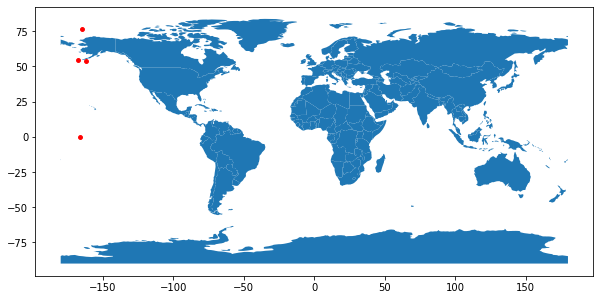

In [182]:
# df = pd.read_csv("Long_Lats.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

### Validate Voyage Data?